In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
ds=xr.open_dataset('ERSST_monthly_1990_2021_2degree_global.nc')

In [5]:
ds.sst

<xarray.DataArray 'sst' (time: 373, lat: 89, lon: 180)>
[5975460 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2021-01-01
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]

In [6]:
sst=ds.sst

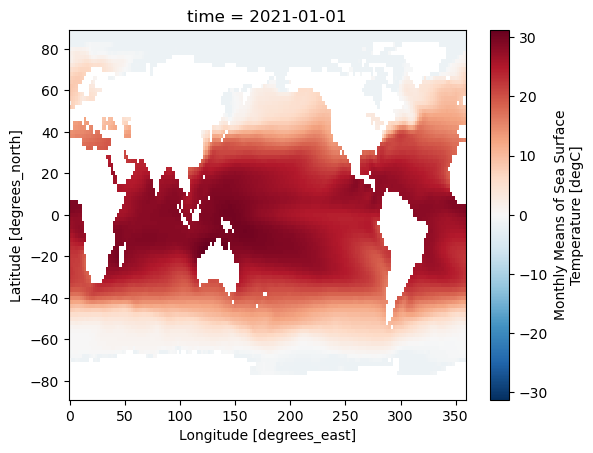

In [7]:
sst[-1].plot()

<xarray.DataArray 'lat' (lat: 89)>
array([ 88.,  86.,  84.,  82.,  80.,  78.,  76.,  74.,  72.,  70.,  68.,  66.,
        64.,  62.,  60.,  58.,  56.,  54.,  52.,  50.,  48.,  46.,  44.,  42.,
        40.,  38.,  36.,  34.,  32.,  30.,  28.,  26.,  24.,  22.,  20.,  18.,
        16.,  14.,  12.,  10.,   8.,   6.,   4.,   2.,   0.,  -2.,  -4.,  -6.,
        -8., -10., -12., -14., -16., -18., -20., -22., -24., -26., -28., -30.,
       -32., -34., -36., -38., -40., -42., -44., -46., -48., -50., -52., -54.,
       -56., -58., -60., -62., -64., -66., -68., -70., -72., -74., -76., -78.,
       -80., -82., -84., -86., -88.], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [10]:

weights = np.cos(np.deg2rad(sst.lat))
weights.name = "weights"


In [19]:
weights

<xarray.DataArray 'weights' (lat: 89)>
array([0.0348995 , 0.06975651, 0.10452842, 0.1391731 , 0.17364822,
       0.20791166, 0.2419219 , 0.2756374 , 0.30901697, 0.34202015,
       0.37460664, 0.4067366 , 0.43837115, 0.4694716 , 0.49999997,
       0.52991927, 0.5591929 , 0.5877853 , 0.6156615 , 0.64278764,
       0.66913056, 0.6946584 , 0.7193398 , 0.7431448 , 0.76604444,
       0.7880108 , 0.809017  , 0.8290376 , 0.8480481 , 0.8660254 ,
       0.88294756, 0.89879405, 0.9135454 , 0.92718387, 0.9396926 ,
       0.95105654, 0.9612617 , 0.9702957 , 0.9781476 , 0.9848077 ,
       0.99026805, 0.9945219 , 0.9975641 , 0.99939084, 1.        ,
       0.99939084, 0.9975641 , 0.9945219 , 0.99026805, 0.9848077 ,
       0.9781476 , 0.9702957 , 0.9612617 , 0.95105654, 0.9396926 ,
       0.92718387, 0.9135454 , 0.89879405, 0.88294756, 0.8660254 ,
       0.8480481 , 0.8290376 , 0.809017  , 0.7880108 , 0.76604444,
       0.7431448 , 0.7193398 , 0.6946584 , 0.66913056, 0.64278764,
       0.6156615 , 0.5877853 , 0.5591929 , 0.52991927, 0.49999997,
       0.4694716 , 0.43837115, 0.4067366 , 0.37460664, 0.34202015,
       0.30901697, 0.2756374 , 0.2419219 , 0.20791166, 0.17364822,
       0.1391731 , 0.10452842, 0.06975651, 0.0348995 ], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

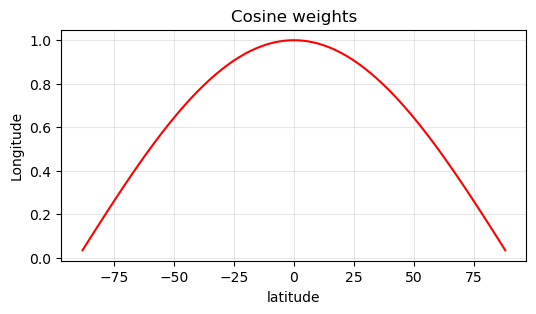

In [18]:
plt.figure(figsize=(6,3))
plt.plot(sst.lat,weights,color='r')
plt.xlabel('latitude')
plt.ylabel('Longitude')
plt.title ('Cosine weights')
plt.grid(alpha=0.3)

In [28]:
sst_weighted = sst.weighted(weights)
sst_weighted_mean = sst_weighted.mean(dim=['lat','lon'])


In [21]:
sst_unweighted_mean=sst.mean(dim=['lat','lon'])

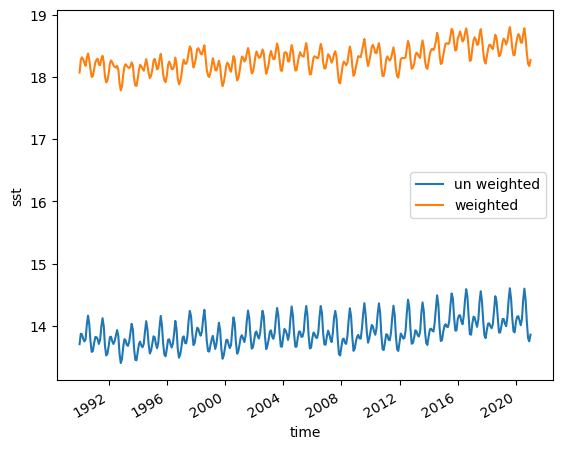

In [32]:
sst_unweighted_mean.plot(label='un weighted')
sst_weighted_mean.plot(label='weighted')
plt.legend()